In [19]:
import intake
from analysis_framework import DATA_CATALOG_PATH

In [20]:
catalog_path = DATA_CATALOG_PATH.joinpath("catalog.yml")
catalog = intake.open_catalog(catalog_path)

In [21]:
list(catalog)

['review_dataset']

In [22]:
df_raw = catalog.review_dataset.read()

In [23]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97097 entries, 0 to 97096
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   skillDevelopment  97006 non-null  float64
 1   reviewText        43222 non-null  object 
 2   location          66513 non-null  object 
 3   cons              85931 non-null  object 
 4   salaryBenefits    96451 non-null  float64
 5   workLifeBalance   97008 non-null  float64
 6   pros              90430 non-null  object 
 7   workSatisfaction  96454 non-null  float64
 8   postedon          97096 non-null  object 
 9   jobSecurity       96464 non-null  float64
 10  careerGrowth      96446 non-null  float64
 11  companyCulture    96473 non-null  float64
 12  company           97096 non-null  object 
 13  jobFunction       96897 non-null  object 
 14  overallScore      97097 non-null  float64
 15  file              97097 non-null  object 
dtypes: float64(8), object(8)
memory usage: 1

### Empty data percentage for each column

In [60]:
df_raw.isnull().sum()/df_raw.shape[0] *100

skillDevelopment     0.093721
reviewText          55.485751
location            31.498399
cons                11.499840
salaryBenefits       0.665314
workLifeBalance      0.091661
pros                 6.866330
workSatisfaction     0.662224
postedon             0.001030
jobSecurity          0.651925
careerGrowth         0.670464
companyCulture       0.642656
company              0.001030
jobFunction          0.205980
overallScore         0.000000
file                 0.000000
dtype: float64

In [70]:
df_raw.head(5)

,skillDevelopment,reviewText,location,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,careerGrowth,companyCulture,company,jobFunction,overallScore,file
0,1.0,Its good and managable only because of team.,Lucknow,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,1.0,4.0,HCL Technologies,Hr Executive,1.0,hcl
1,4.0,Very balanced and rarely pressuring.,Noida,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,4.0,3.0,HCL Technologies,Technical Lead,4.0,hcl
2,3.0,working hours are 9:30 hours no shift allowanc...,Greater Noida,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,2.0,2.0,HCL Technologies,Senior Specialist,3.0,hcl
3,1.0,Too bad for a mid level experienced. Enquire p...,Chennai,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,09-Dec-21,4.0,1.0,1.0,HCL Technologies,Senior Technical Lead,1.0,hcl
4,1.0,Is there anything called work life balance her...,Chennai,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,04-Mar-22,4.0,1.0,1.0,HCL Technologies,Software Engineer,1.0,hcl


<AxesSubplot:>

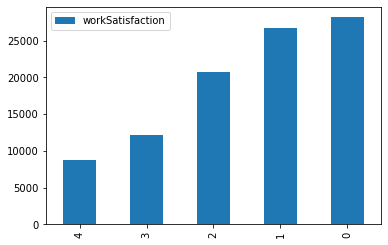

In [83]:
df_raw.workSatisfaction.value_counts().reset_index().sort_values(by='workSatisfaction').drop('index', axis=1).plot(kind='bar')

<AxesSubplot:>

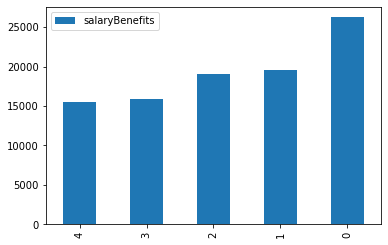

In [84]:
df_raw.salaryBenefits.value_counts().reset_index().sort_values(by='salaryBenefits').drop('index', axis=1).plot(kind='bar')

<AxesSubplot:>

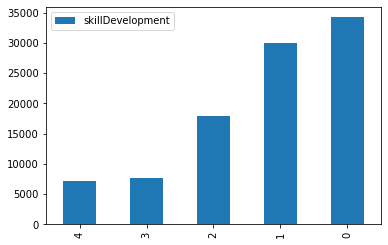

In [85]:
df_raw.skillDevelopment.value_counts().reset_index().sort_values(by='skillDevelopment').drop('index', axis=1).plot(kind='bar')